In [ ]:
# from https://cospar.readthedocs.io/en/latest/20210121_reprogramming_static_barcoding_v2.html
# https://github.com/SZ-yang/SCSeq_LineageBarcoding/blob/kevin/kevin/Writeup4_cospar/Writeup4_cospar-LARRY_postprocess.ipynb
import cospar as cs
import numpy as np
import anndata as ad

In [2]:
cs.logging.print_version()
cs.settings.verbosity = 2
cs.settings.data_path = "/home/users/kzlin/kzlinlab/projects/scContrastiveLearn/out/kevin/Writeup11/celltagmulti_data"  # A relative path to save data. If not existed before, create a new one.
cs.settings.figure_path = "/home/users/kzlin/kzlinlab/projects/scContrastiveLearn/out/kevin/Writeup11/celltagmulti_figure"  # A relative path to save figures. If not existed before, create a new one.


Running cospar 0.4.1 (python 3.9.20) on 2026-01-23 16:06.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [3]:
adata = ad.read_h5ad("/home/users/kzlin/kzlinlab/projects/scContrastiveLearn/out/kevin/Writeup11/Writeup11_celltagemulti_cospar.h5ad")
adata

AnnData object with n_obs × n_vars = 22238 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'CC.Difference', 'RNA_snn_res.0.8', 'seurat_clusters', 'sample', 'replicate', 'predicted.id_cca_co', 'prediction.score.Fib_1_cca_co', 'prediction.score.Fib_0_cca_co', 'prediction.score.Fib_2_cca_co', 'prediction.score.Early_0_cca_co', 'prediction.score.Tran_0_cca_co', 'prediction.score.Tran_1_cca_co', 'prediction.score.Early_1_cca_co', 'prediction.score.Early_2_cca_co', 'prediction.score.iEP_1_cca_co', 'prediction.score.Tran_2_cca_co', 'prediction.score.iEP_2_cca_co', 'prediction.score.Dead.end_1_cca_co', 'prediction.score.Dead.end_0_cca_co', 'prediction.score.iEP_0_cca_co', 'prediction.score.Dead.end_2_cca_co', 'prediction.score.max_cca_co', 'RNA_snn_res.0.2', 'cellranger_ident', 'md_fate_rev1', 'md_fate_coarse_rev1', 'cell_name', 'has_lineage', 'keep', 'time_info', 'state_info'
    var: 'vst.mean', 'vst.variance', 'vst.vari

In [4]:
cs.tl.fate_bias(
    adata,
    selected_fates=["reprogramming", "dead-end"],
    source="transition_map",
    pseudo_count=0,
    sum_fate_prob_thresh=0.1,
)

Results saved at adata.obs['fate_map_transition_map_reprogramming']
Results saved at adata.obs['fate_map_transition_map_dead-end']
Results saved at adata.obs['fate_bias_transition_map_reprogramming*dead-end']


/home/users/kzlin/miniconda3/envs/cospar/lib/python3.9/site-packages/cospar/tool/_utils.py:235: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  state_annote[cell_id_t2] == yy


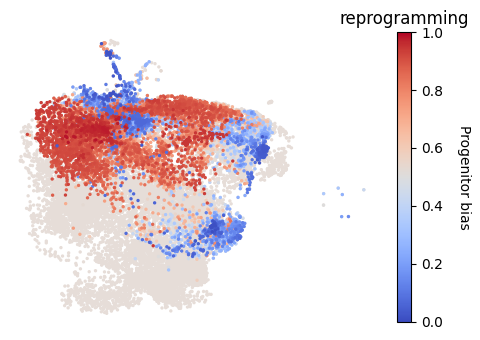

In [6]:
cs.pl.fate_bias(
    adata,
    selected_fates=["reprogramming", "dead-end"],
    source="transition_map",
    plot_target_state=False,
    selected_times=["3"],
)

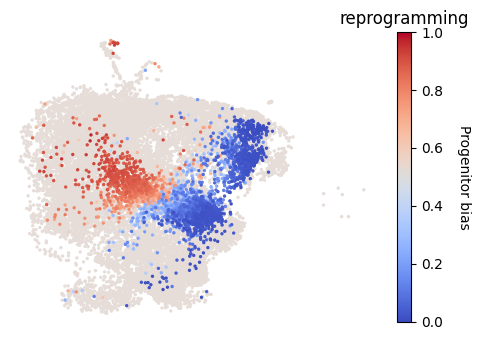

In [7]:
cs.pl.fate_bias(
    adata,
    selected_fates=["reprogramming", "dead-end"],
    source="transition_map",
    plot_target_state=False,
    selected_times=["12"],
)

In [8]:
# Save adata.obs to a CSV file
adata.obs.to_csv('/home/users/kzlin/kzlinlab/projects/scContrastiveLearn/out/kevin/Writeup11/Writeup11_celltagmulti_cospar_postprocess_adata-obs.csv', index=True)